**Importação de bibliotecas**

In [3]:
#import required packages
import numpy as np
import pandas as pd

**Carregando os dados**

In [5]:
#importacao
df = pd.read_csv("agricultural_raw_material.csv")

**Tabela**

In [ ]:
df.info

**Checando os valores nulos**

In [ ]:
df.info
df.isnull().sum()

**Lidando com valores ausentes, incorretos e invalidos**

In [ ]:
#replace, faz subustituição = ele pega um valor e substitui por outro
#Ex: % por um valor em branco

df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan) #vazio converte em nulo
df = df.replace('MAY90', np.nan)

#Apagar os vlaores nulos
df = df.dropna()

#Listando os novos valores apos apagar os campos nulos e vazios
df.isnull().sum()

#Converter os dados para float
#float = registro, dado com a casa decimal, nesse campos temos preços e percentuais, ou seja, é o ideal para essa variavel
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton Price", "Cotton price % Change", "Fine wool Price", "Fine wool price % Change", "Hard log Price", "Hard log price % Change", "Hard sawnwood Price", "Hard sawnwood price % Change", "Hide Price", "Hide price % change", "Plywood Price", "Plywood price % Change", "Rubber Price", "Rubber price % Change", "Softlog Price", "Softlog price % Change", "Soft sawnwood Price", "Soft sawnwood price % Change", "Wood pulp Price", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes


In [ ]:
df.head()

**Colunas de data e horascolunas**

In [ ]:
#formatando a coluna datatime e definindo-a como indice para o conjunto de dados
#pd.to_datatime = faz a conversao
df.Month = pd.to_datetime(df.Month.str.upper(), format="%b%y", yearfirst=False)
df.set_index('Month')


In [ ]:
df.head()

**Analise exploratória e visualização**
matplotlib, pyplot e seaborn

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Mapa de calor**

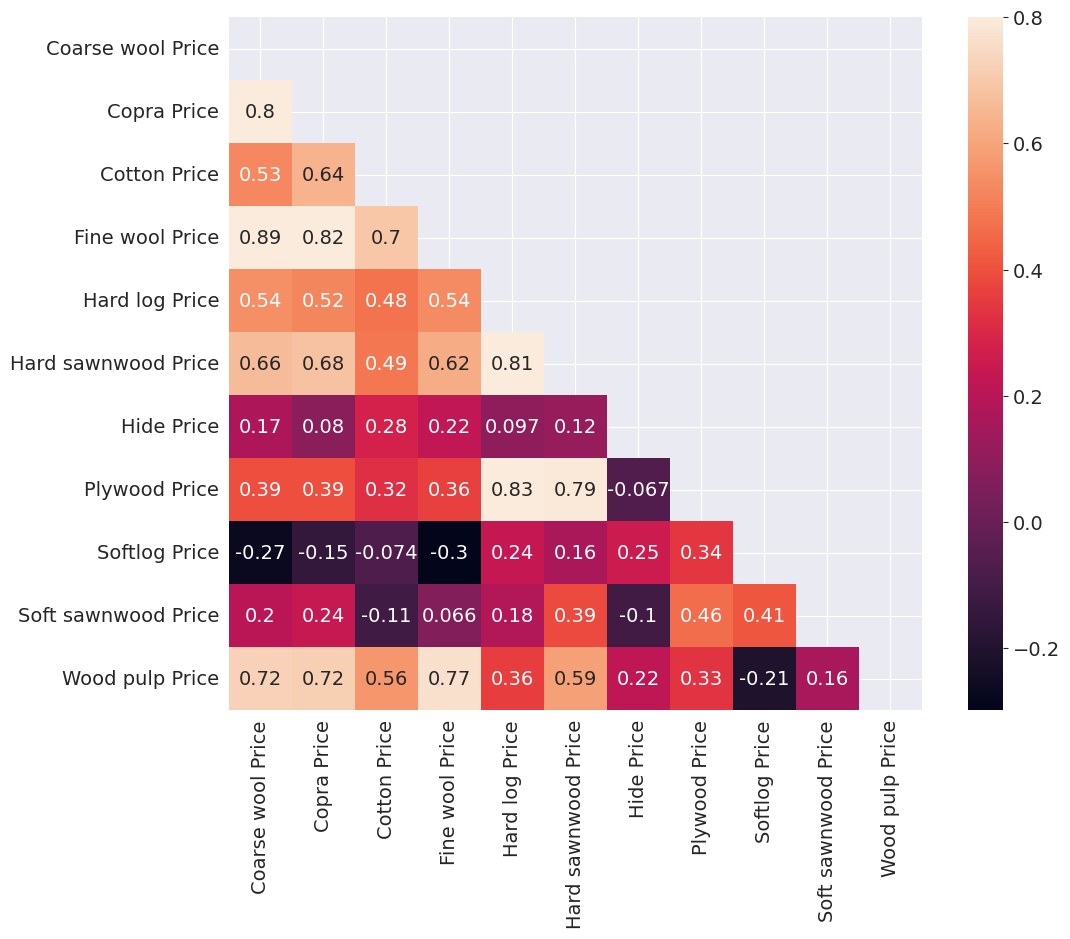

In [44]:
#Nome dos campos que queremos no grafico
raw_data = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price','Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#função de correlação - o quão de relação entre dois campos
corrmat = df[raw_data].corr()
#Podemos ver se o preço de uma determinada matéria prima esta correlacionada com o preço de outra materia prima
fig = plt.figure(figsize = (12, 9)) #plotagem do grafico
#
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8, mask=mask, square = True, annot = True)
plt.show()

O mapa de calor mostra a correlação entre as matérias-primas maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas, mas não necessariamente.

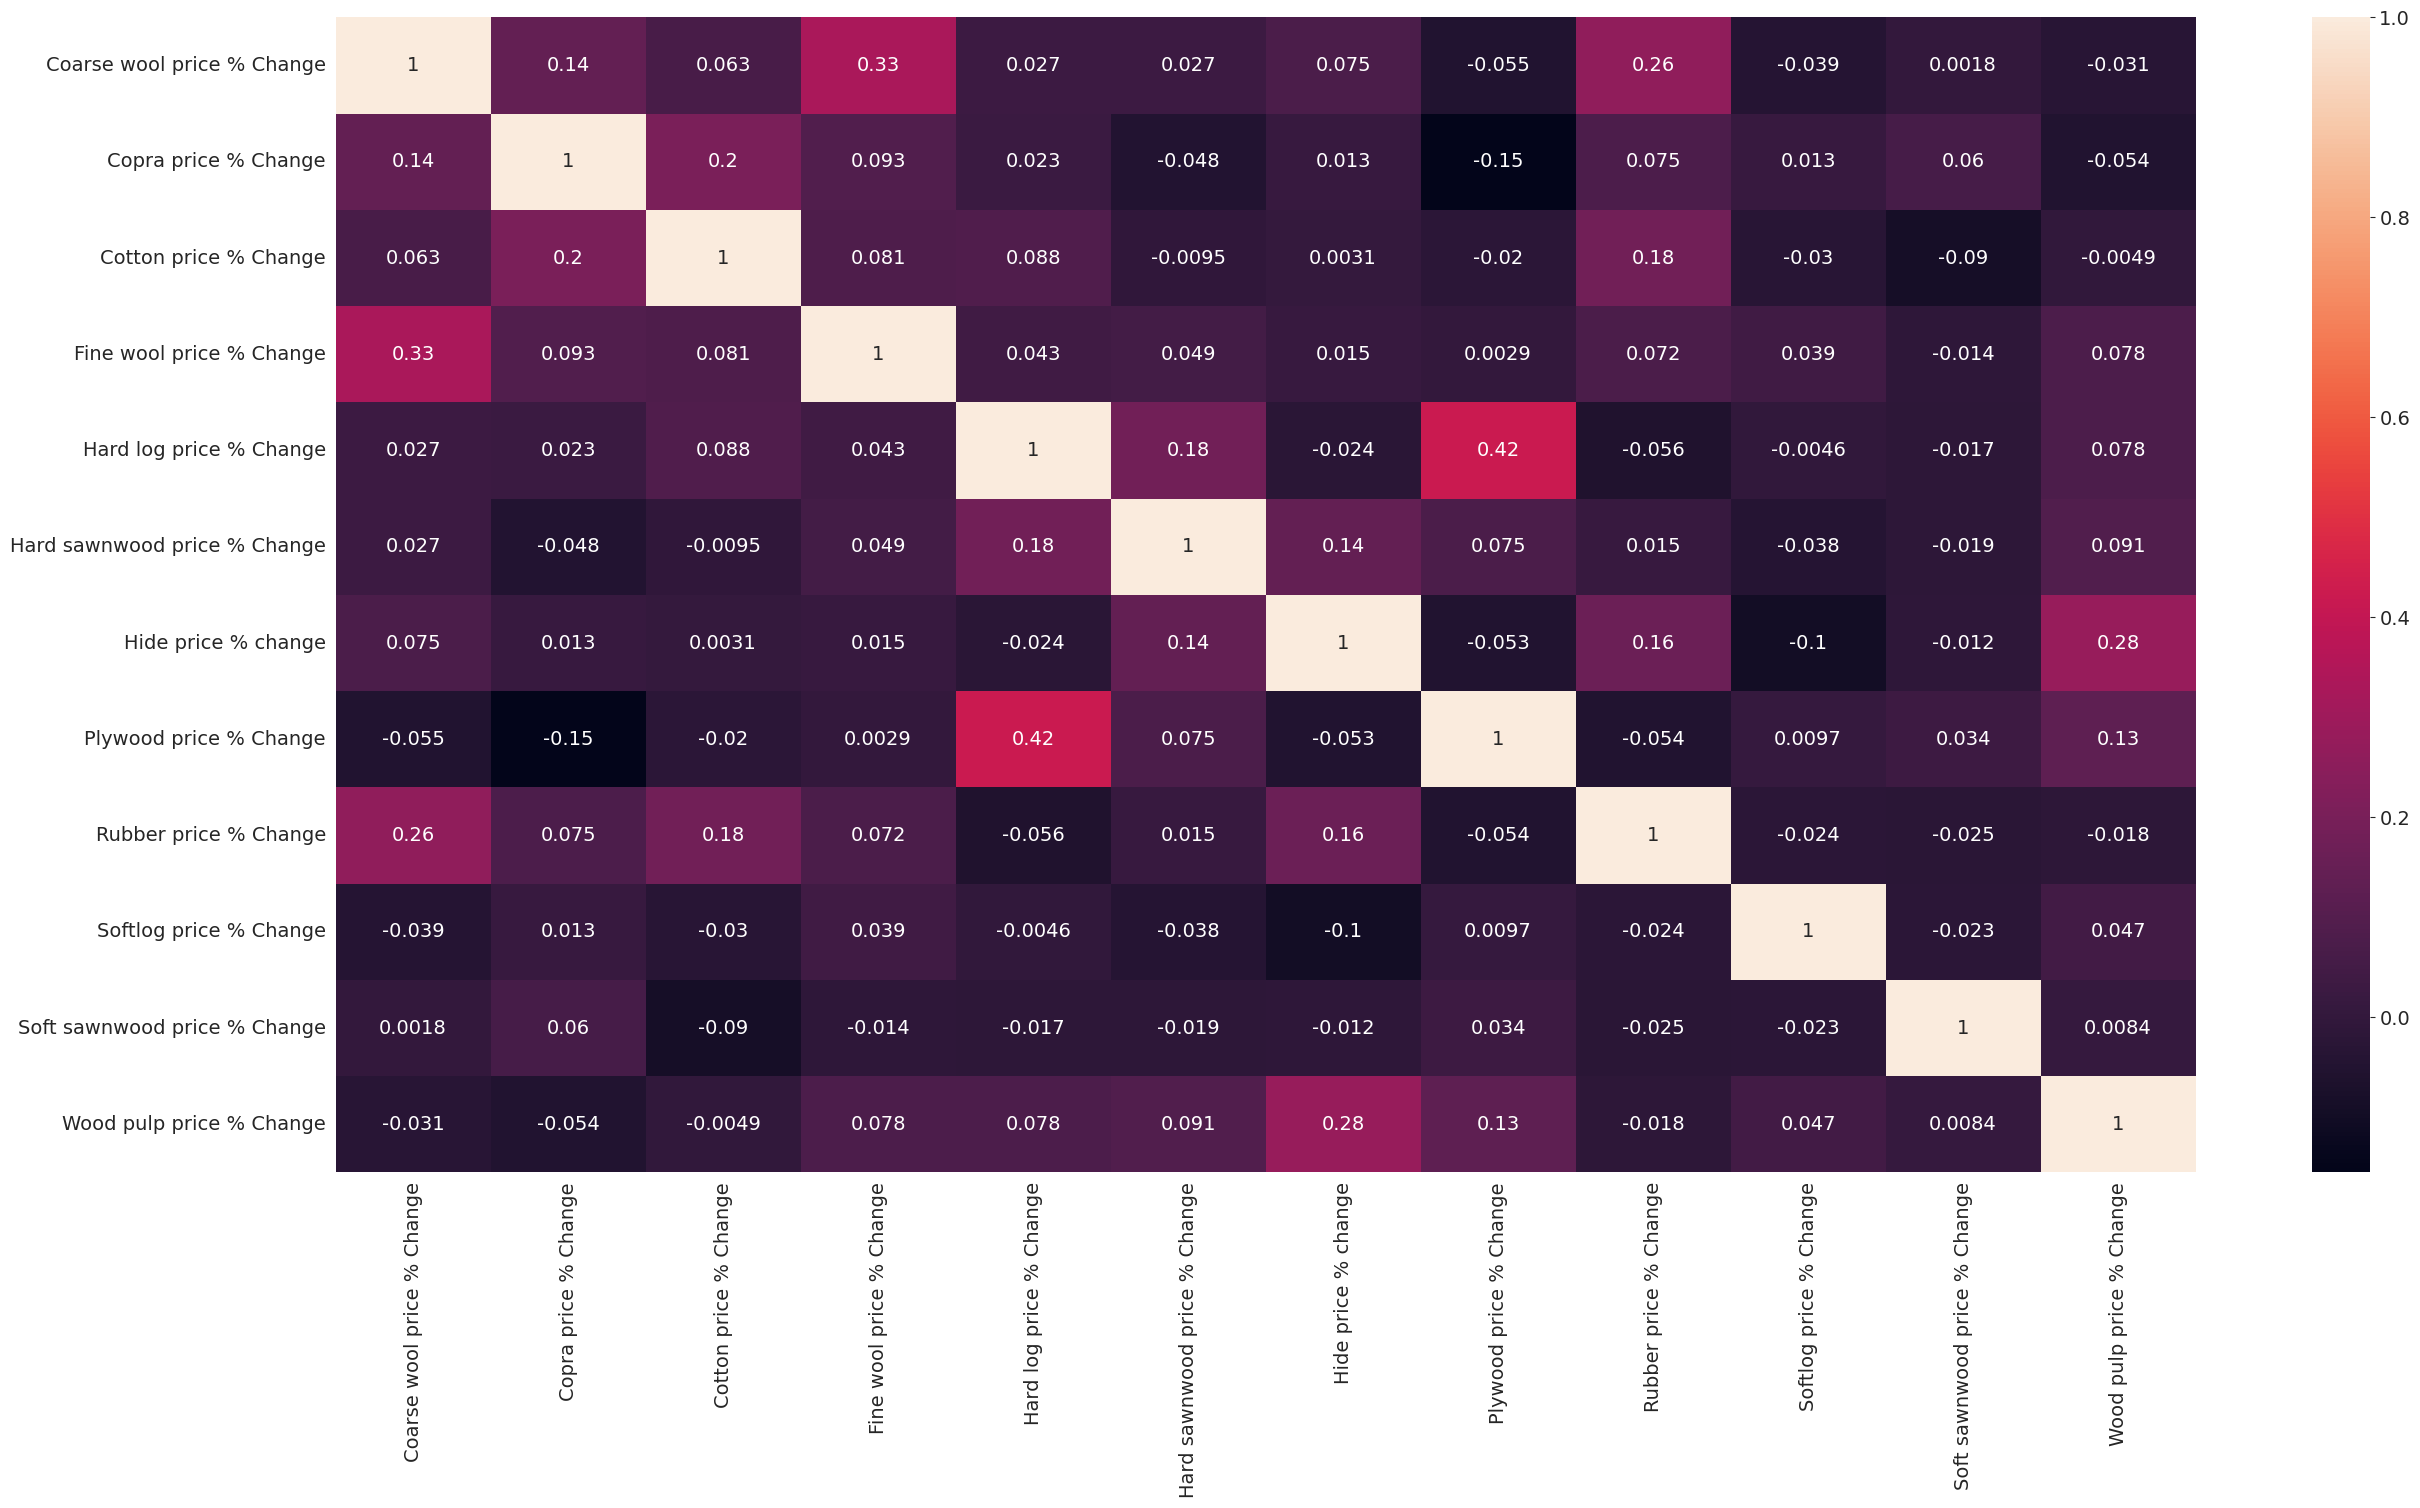

In [45]:
plt.figure(figsize=(30,15))
changelist = ["Coarse wool price % Change","Copra price % Change", "Cotton price % Change", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
#percentual de variação = 1
#estatisticamente falando, uma correlação é acima de 0.7
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir deste grafico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas


*   O valor negativo implica que duas variaveis estão negativas correlacionadas (um aumento, outro decréscimo)
*   Zero implica nenhuma relação
Caso contrário, maior o valor maior a chance de relação, preços e seus gráficos de % de mudança.



**Lã grossa**

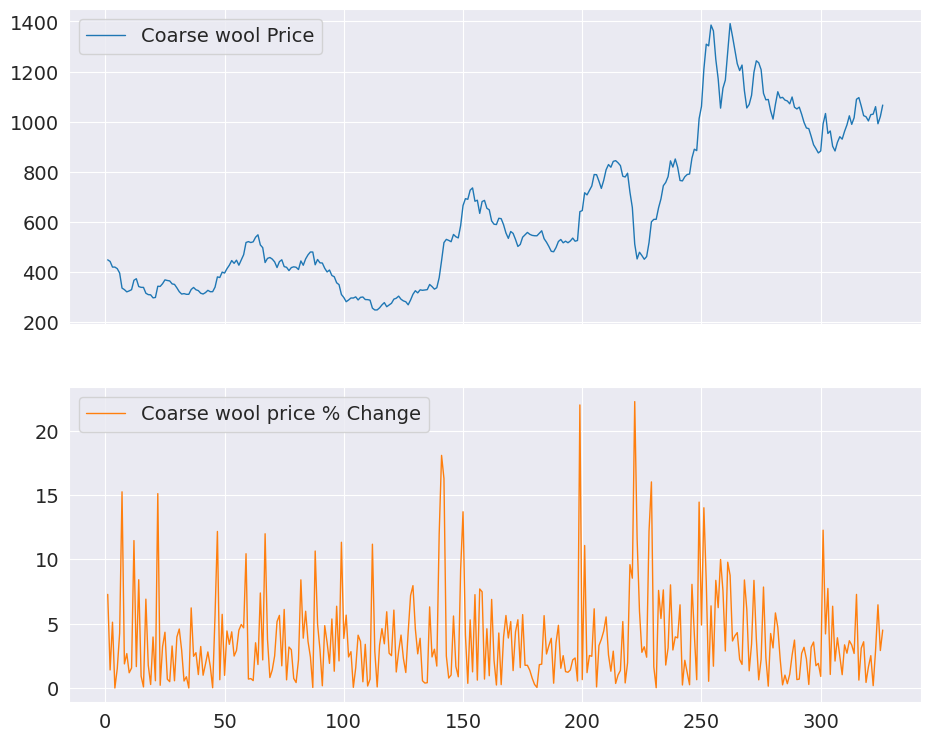

In [46]:
axes=df[['Coarse wool Price', "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

# **QUESTIONÁRIO**

1 - Descubra a variação normal do preço de cada matéria-prime

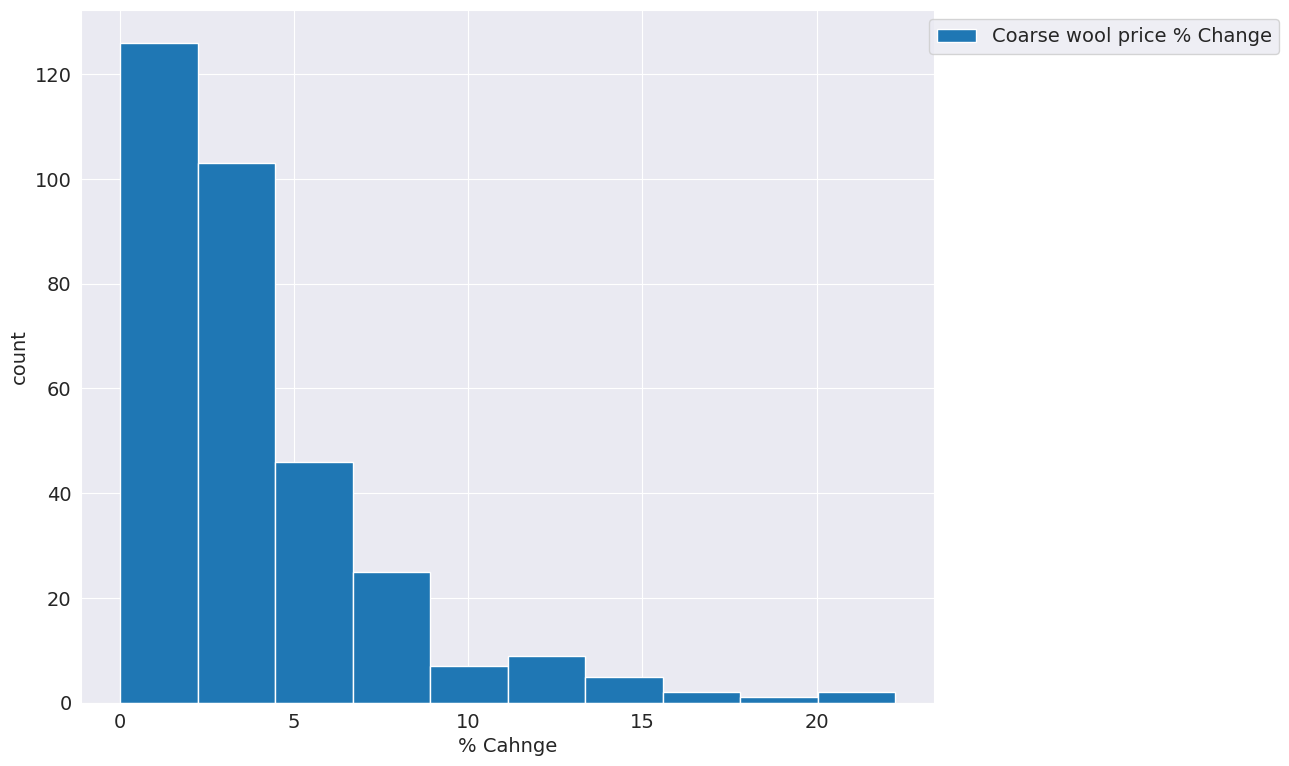

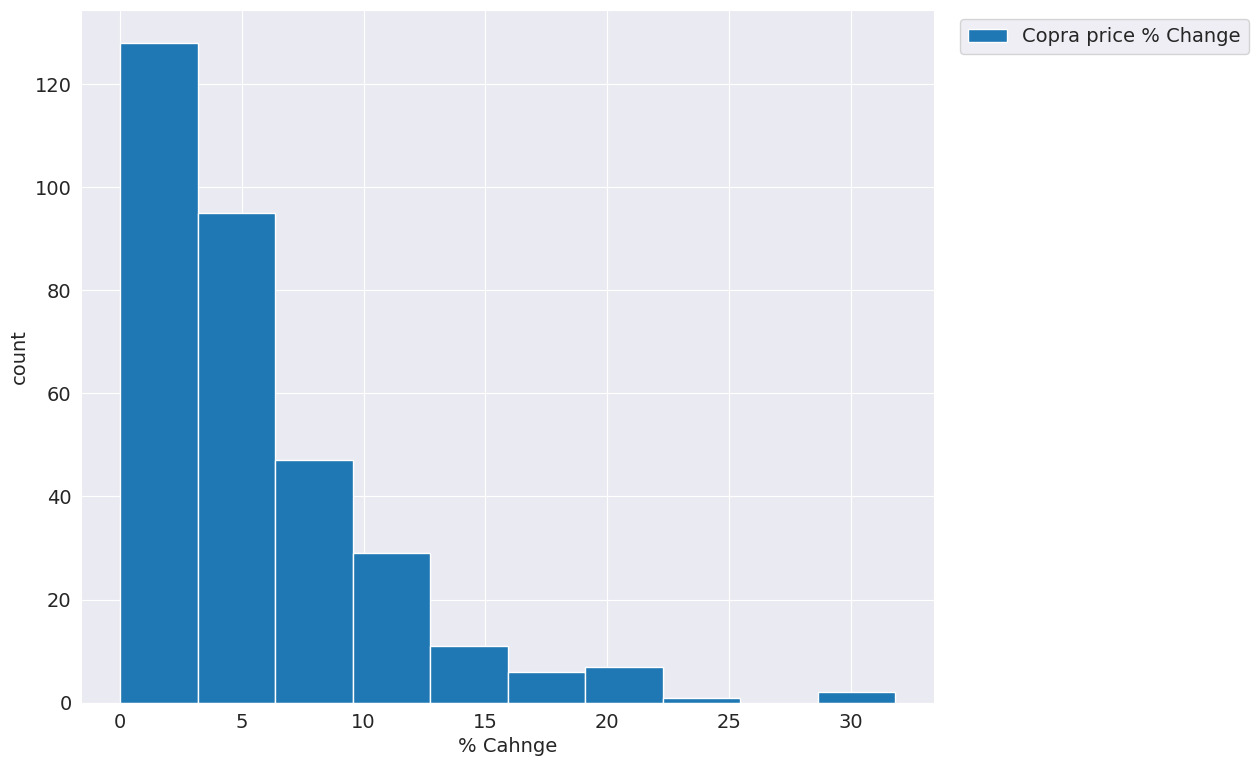

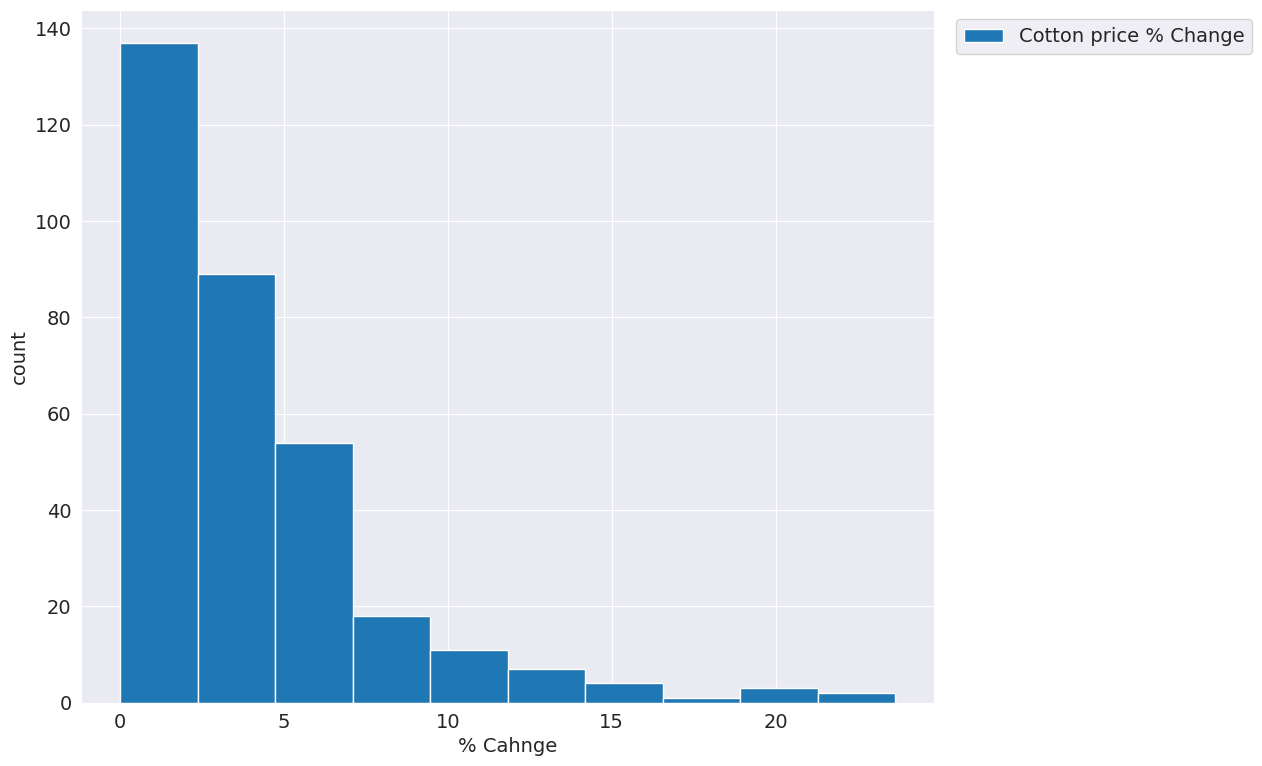

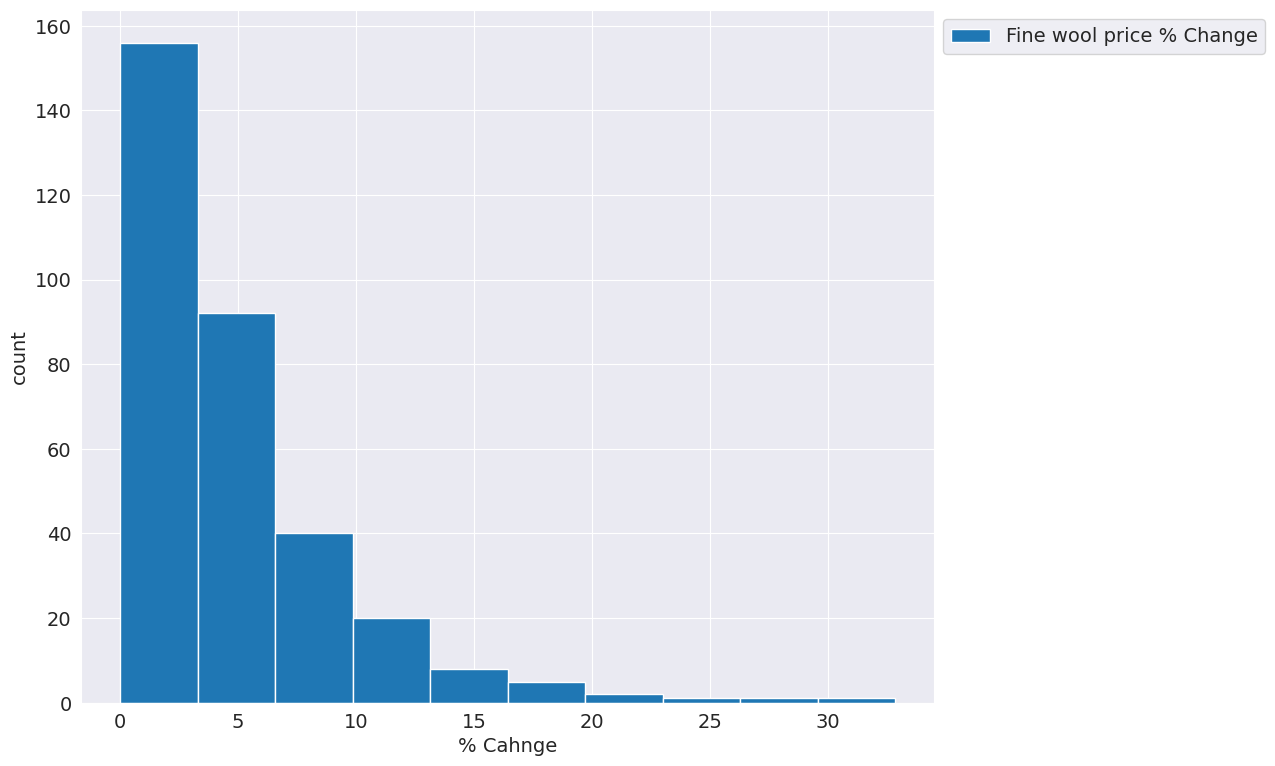

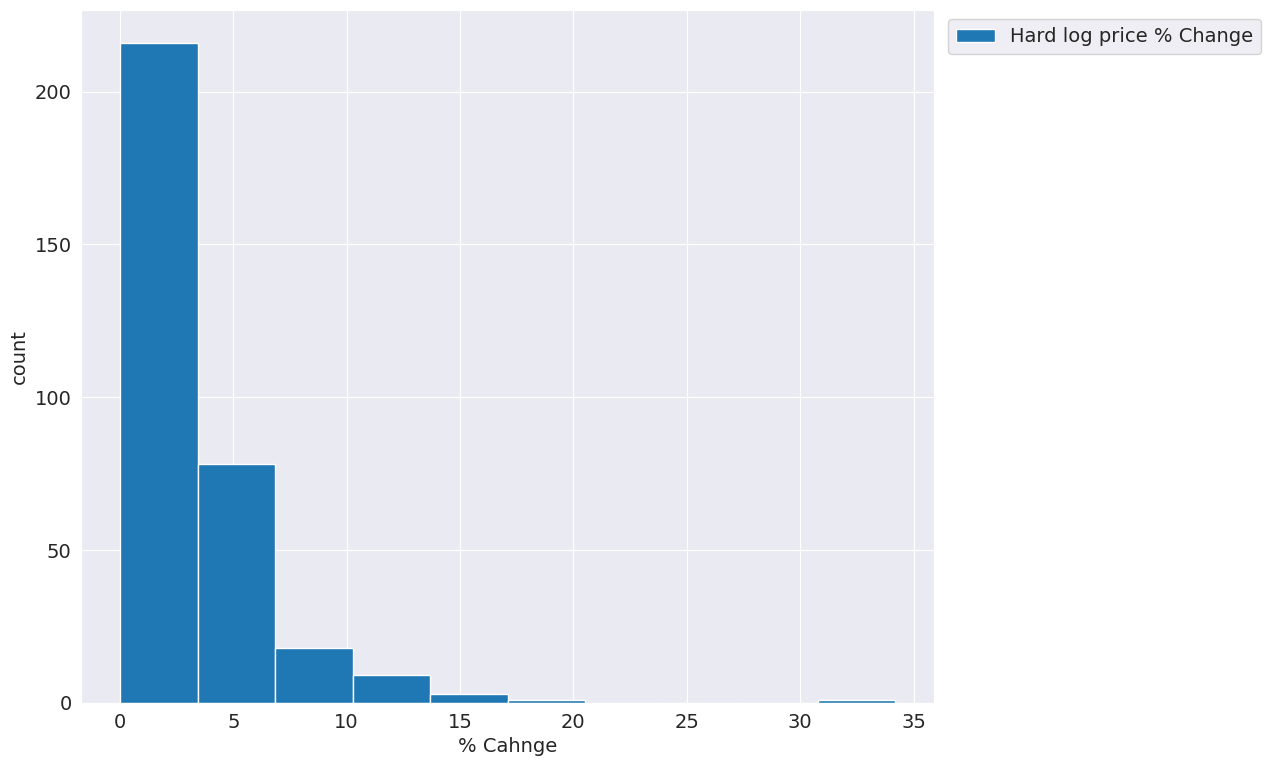

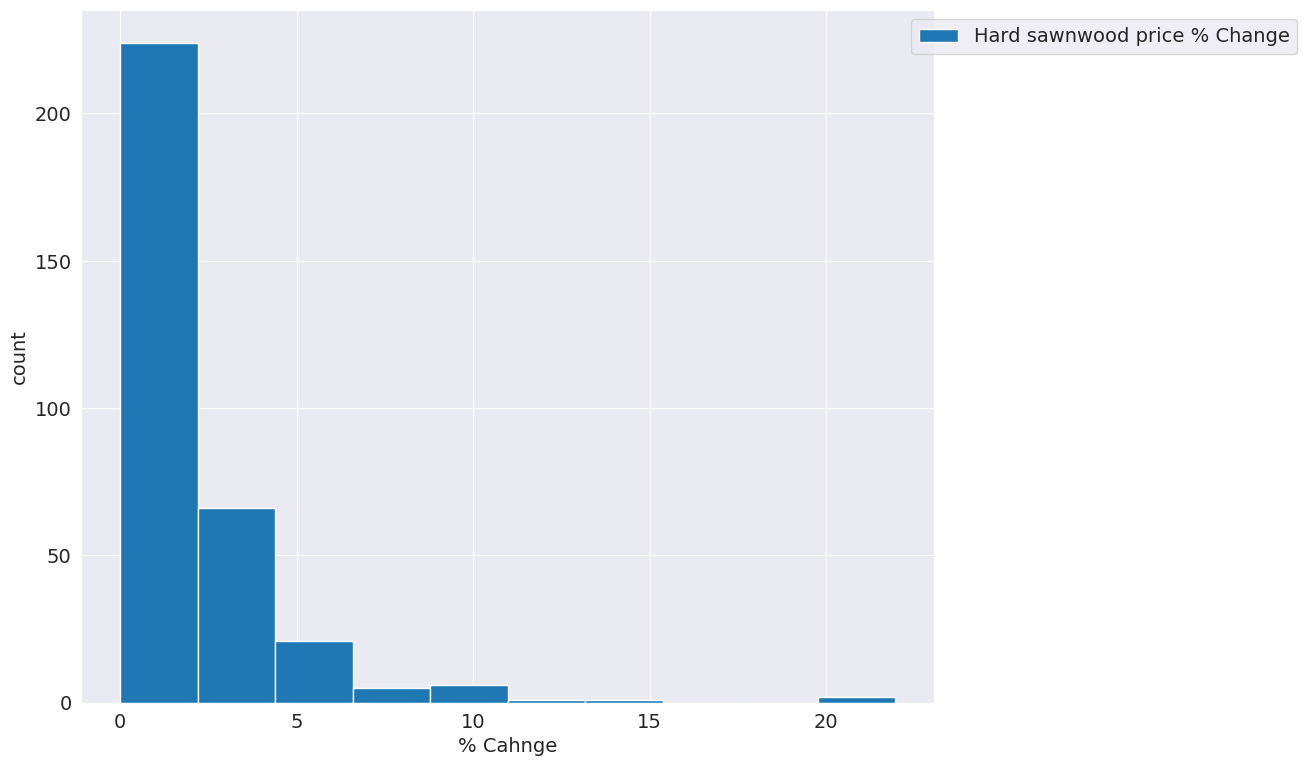

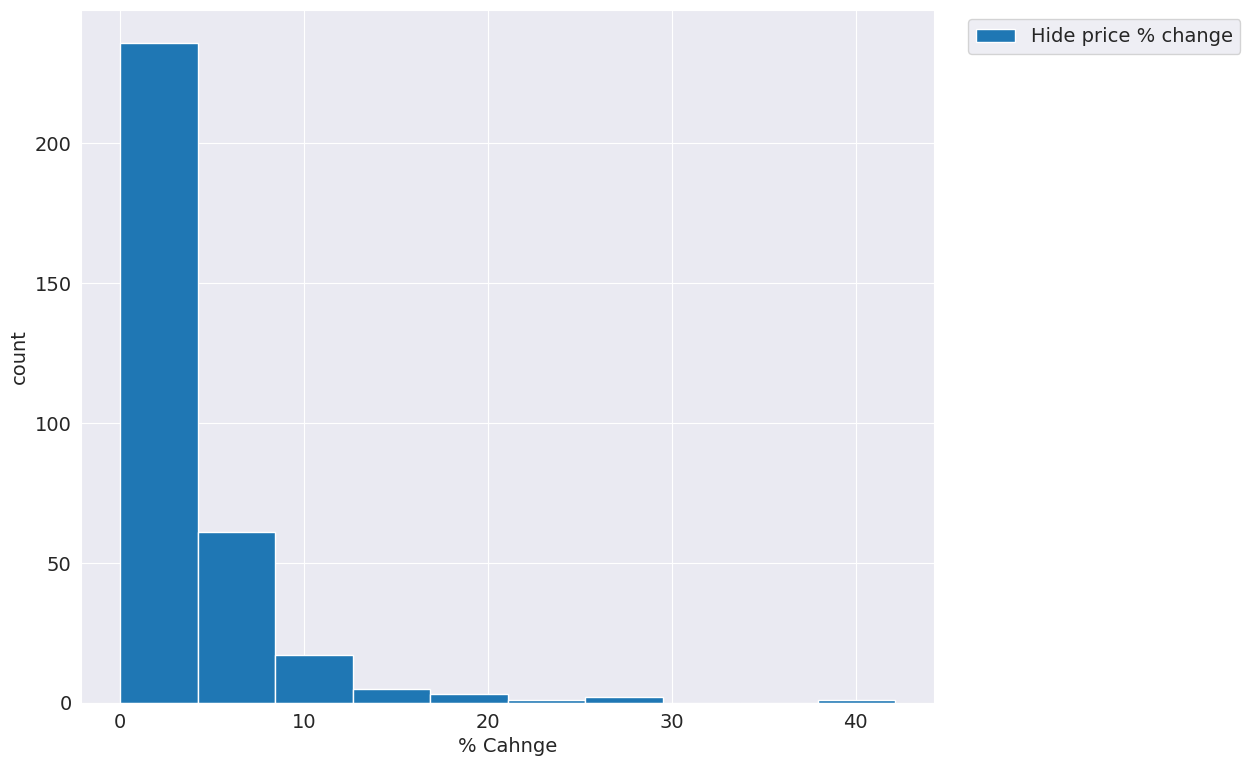

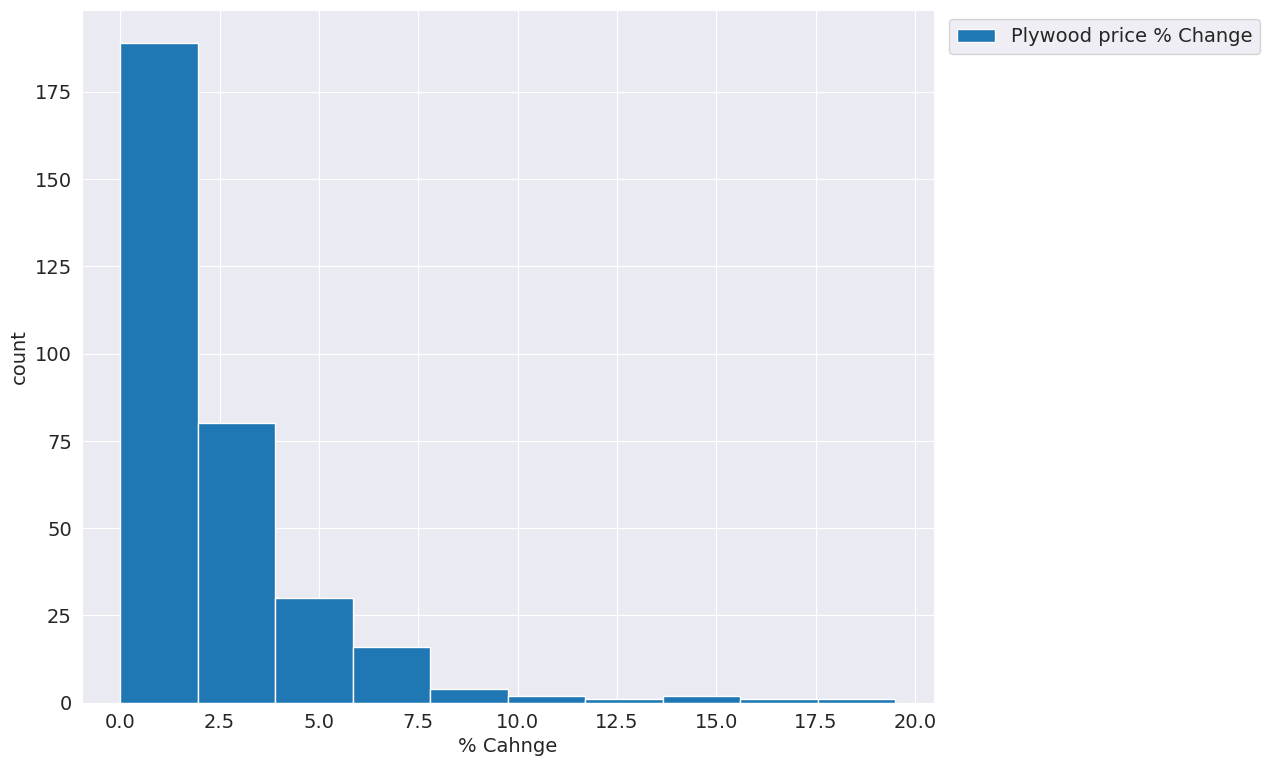

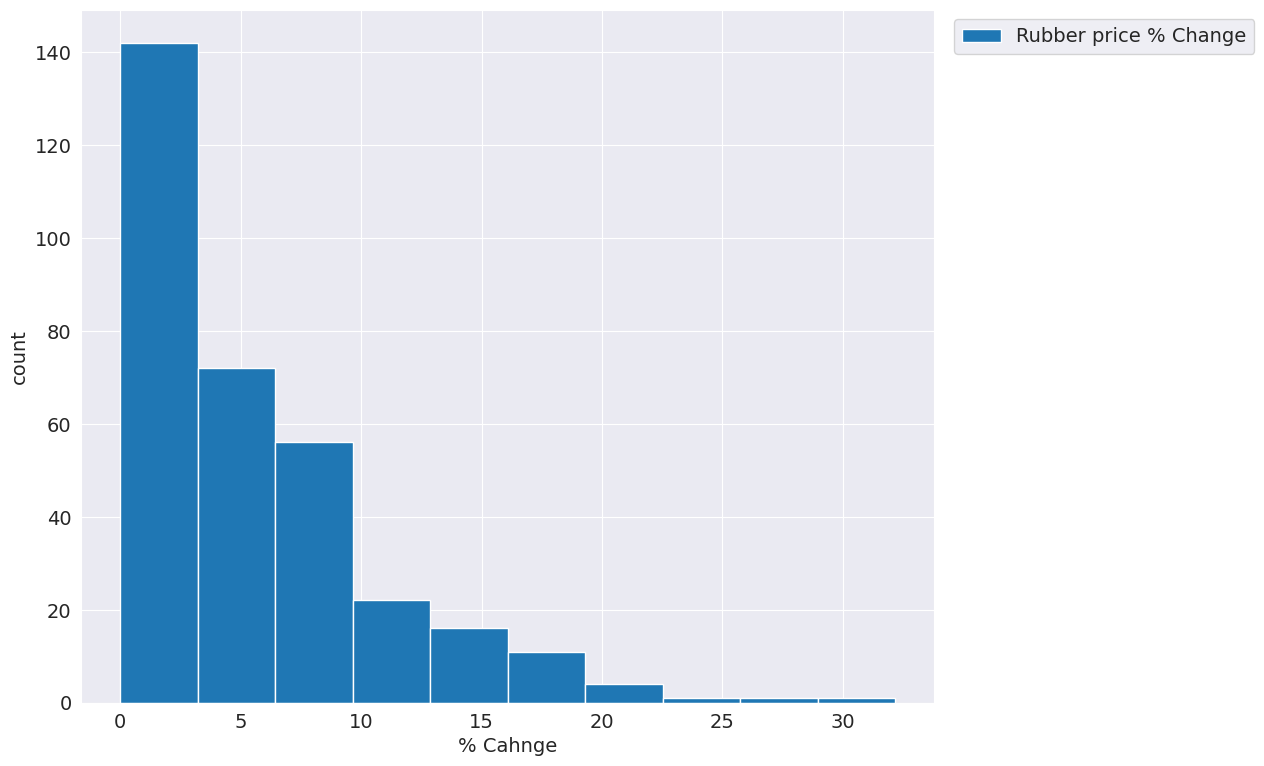

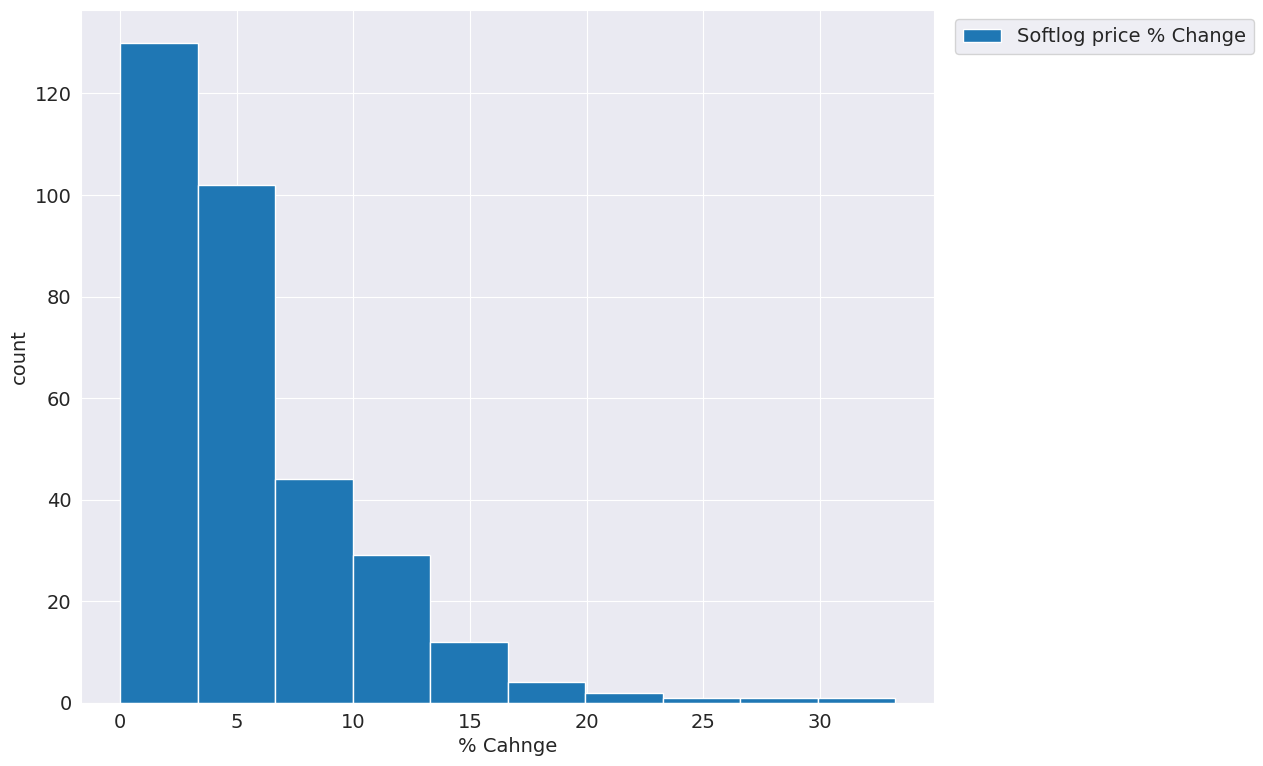

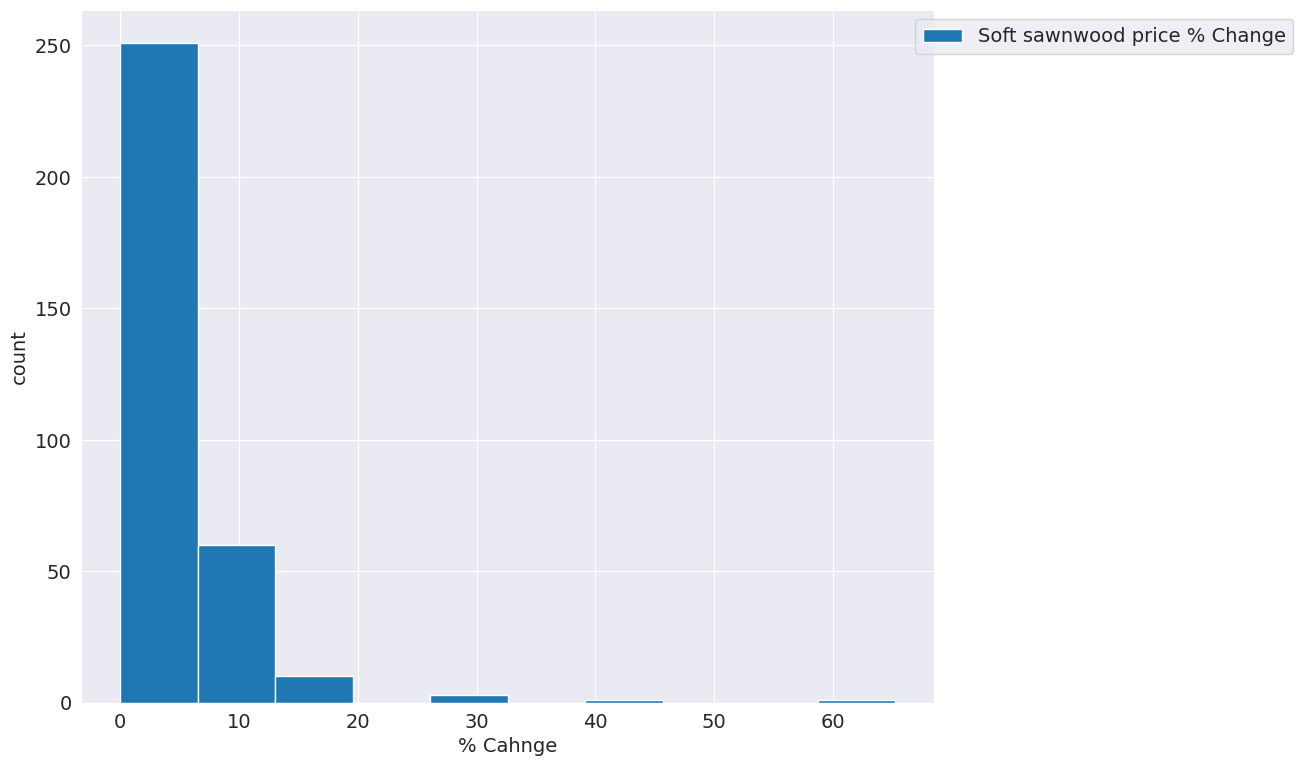

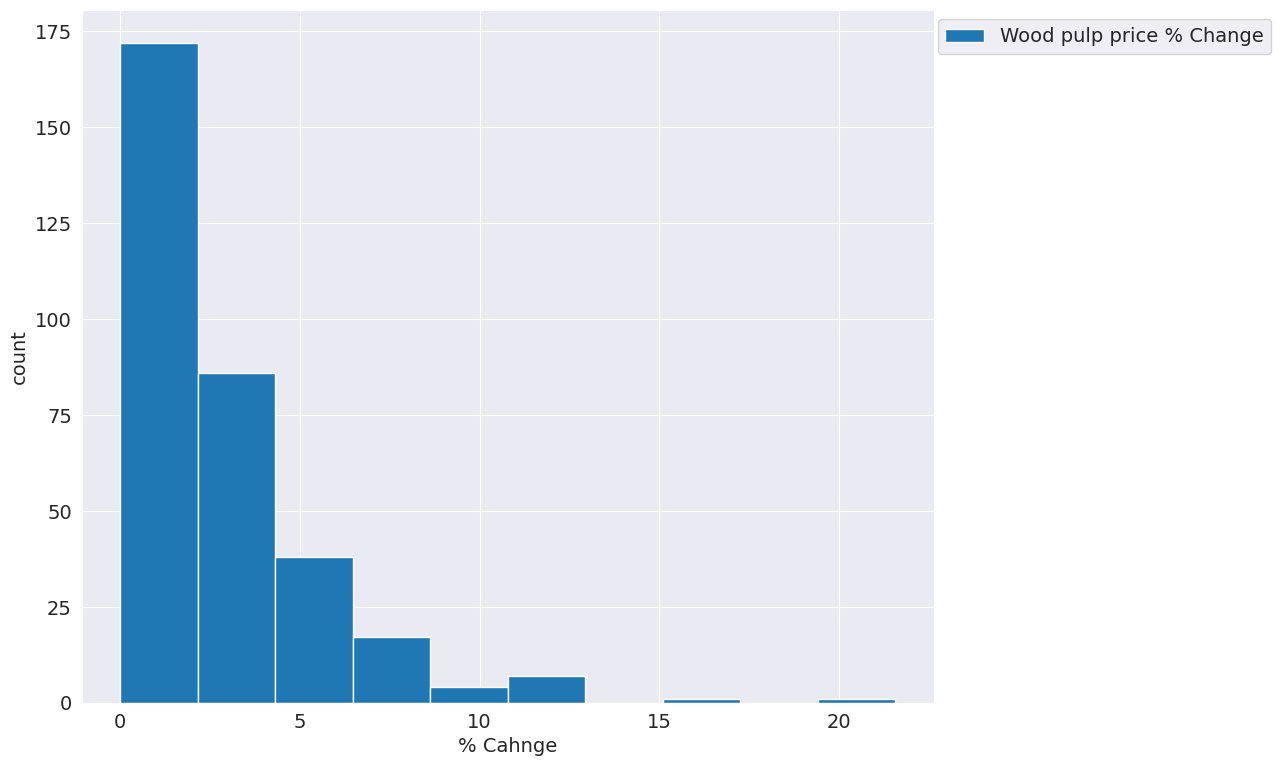

In [40]:
changelist = ["Coarse wool price % Change","Copra price % Change", "Cotton price % Change", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
for i in range(len(changelist)): #para cada registro que eu tenho dentro do dataframe, ele vai fazer um grafico diferente
  plt.figure(figsize=(12,12))
  df[changelist[i]].hist(figsize=(11,9), linewidth=1)
  plt.xlabel('% Cahnge')
  plt.ylabel('count')
  plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2,1))

Podemos observar que a maioria das matéria-primas tem % de mudança frequente ideal iferior a 5%

2 - Encontre a matéria-prima que tem o menor preço ao longo dos anos

Text(0.5, 0.98, 'Raw-Materials price comparision')

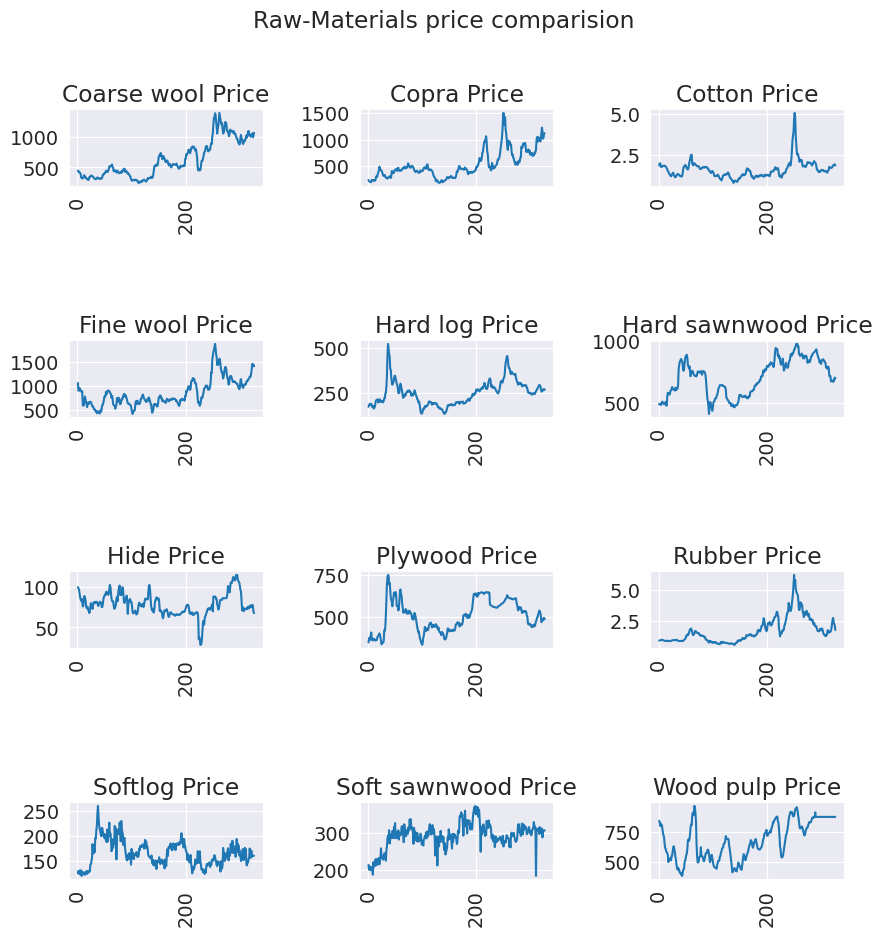

In [41]:
plt.figure(figsize=(10, 10))
materiallist = ["Coarse wool Price","Copra Price", "Cotton Price", "Fine wool Price", "Hard log Price", "Hard sawnwood Price", "Hide Price", "Plywood Price", "Rubber Price", "Softlog Price", "Soft sawnwood Price", "Wood pulp Price"]
for i in range(len(materiallist)):
  plt.subplot(4,3,i+1)
  plt.subplots_adjust( hspace=2, wspace=0.5)
  plt.title(materiallist[i])
  plt.plot(df[materiallist[i]])
  plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")

Podemos ver que o algodão e a borracha são de preços mais baixos, vamos comparar preços para entender melhor qual é o mais baixo

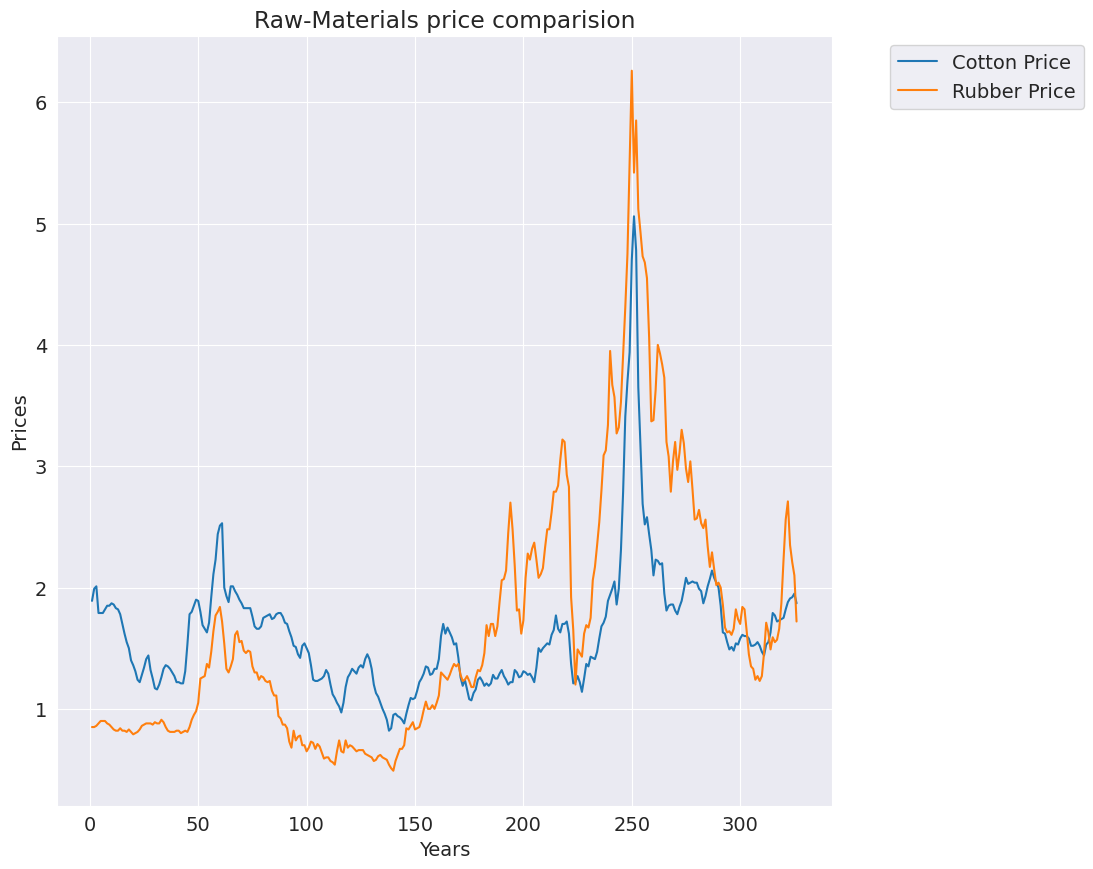

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title('Raw-Materials price comparision')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price', 'Rubber Price'], loc='upper center', bbox_to_anchor=(1.2,1))

algodão é a matéria-prima demenor preço nos ultimos anos.
Tanto o algodão quanto a borracha são matérias de baixo preço.

3 - Qual a matéria-prima tem a maior e menor variação de % de preço

In [33]:
import random as random

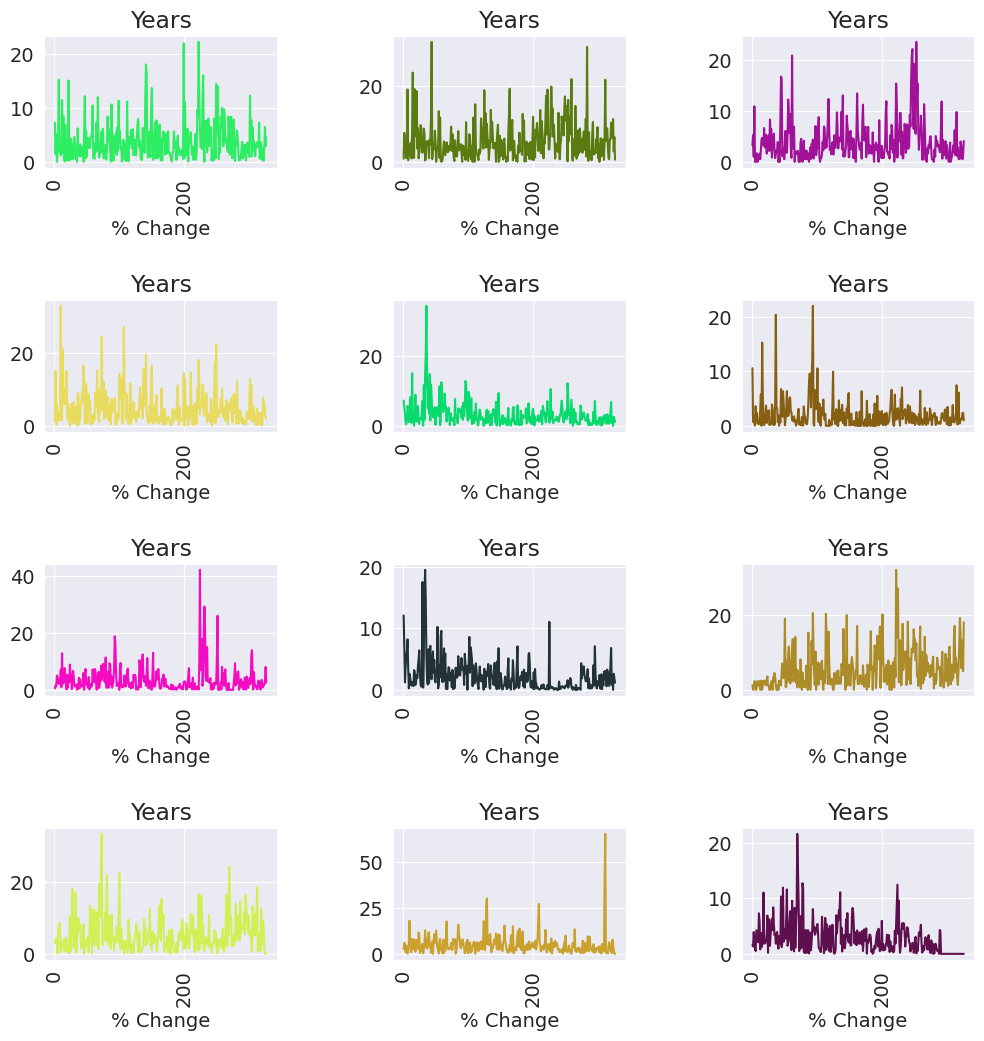

In [43]:
plt.figure(figsize=(12,12))
for i in range(len(changelist)):

  r = random.random()
  b = random.random()
  g = random.random()
  color = (r,g,b)
  plt.subplot(4,3,i+1)
  plt.subplots_adjust( hspace=1, wspace=0.5)
  plt.plot(df[changelist[i]], c=color)
  plt.xticks(rotation=90)
  plt.title(changelist[i])
  plt.title('Years')
  plt.xlabel('% Change')

Podemos ver a maior % de mudanças em mais de  para madeira serrada macia e a menor % de mudança é para madeira compensada em menor de 20

4 - Encontre as matérias primas com mudanla drástica de preço

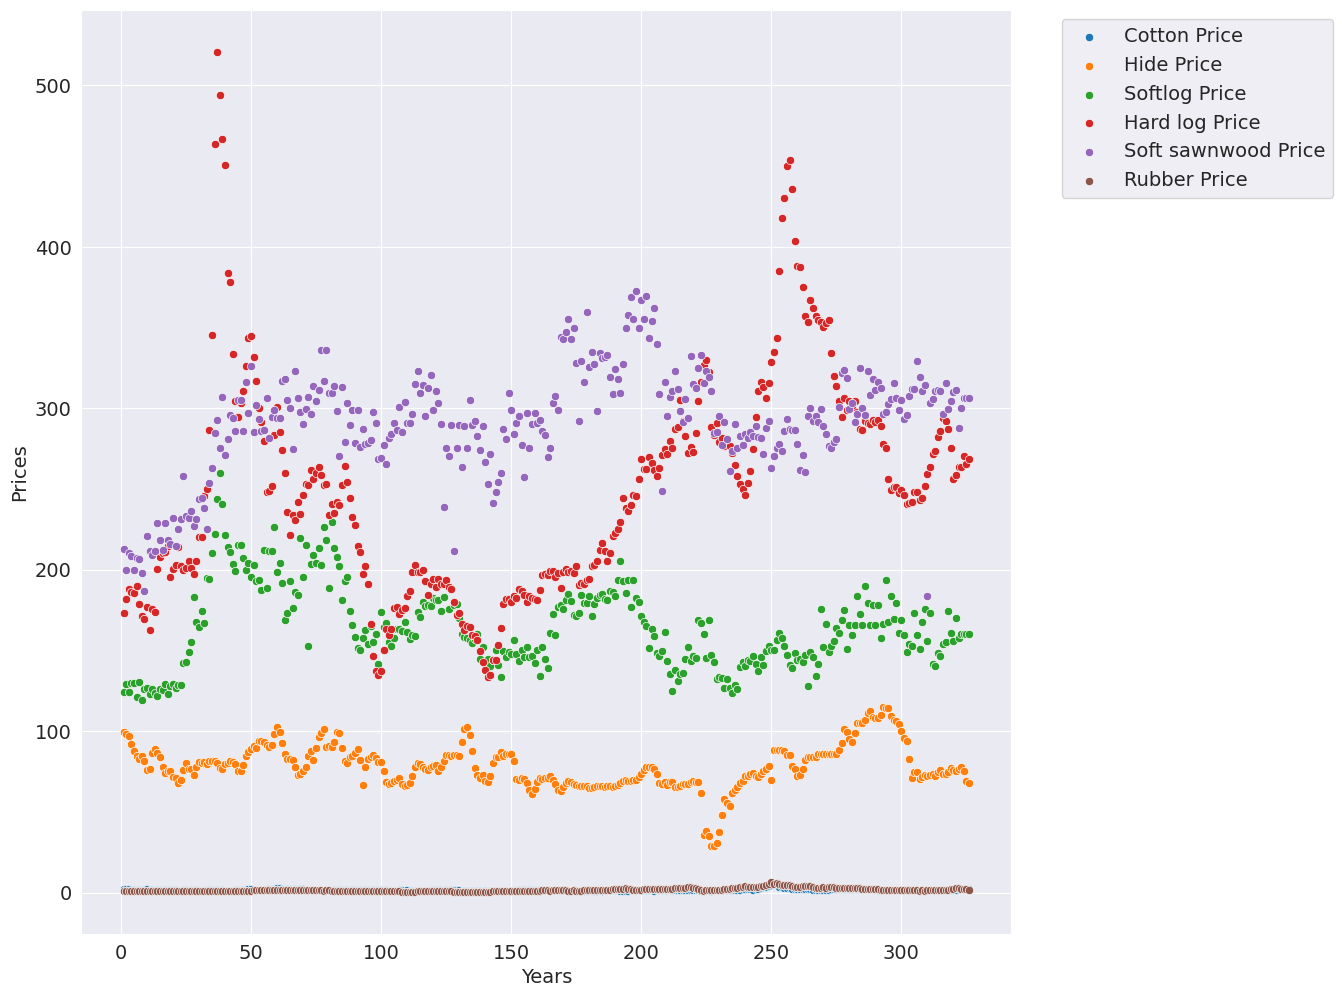

In [39]:
lowlist=['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
for i in range(len(lowlist)):
  sns.scatterplot(y=df[lowlist[i]],x=df.index);
  plt.legend(lowlist,loc='upper center', bbox_to_anchor=(1.2,1))


5 - Descobrir a faixa de preço de matérias-primas de baixo preço

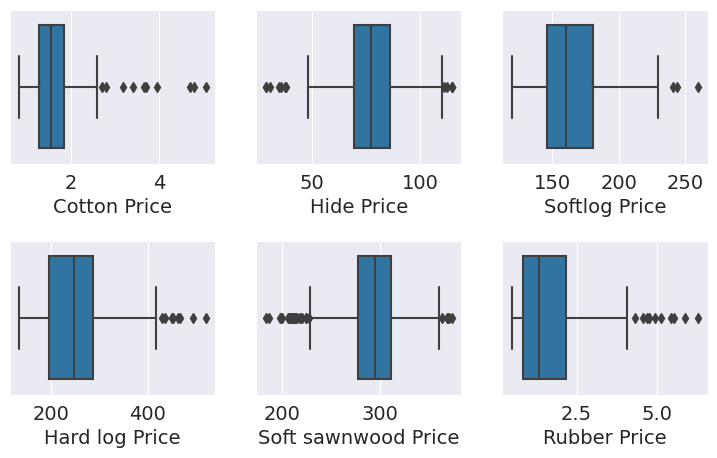

In [48]:
lowlist=['Cotton Price', 'Hide Price','Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.subplots_adjust( hspace=0.5 )
  sns.boxplot(x=df[lowlist[i]])

# **Conclusão:**


*  Matérias-primas de alta e baixa gama de acordo com seus preços
*   Alta e baixa % de variação dos materiais
*   A variação de preços ao longo dos anos
*   Correlação entre eles usando um mapa de calor





